<a href="https://colab.research.google.com/github/dinghan12306/Readability-Analysis-of-Privacy-Policies/blob/main/%E5%A4%A7%E8%A7%84%E6%A8%A1%E7%BD%91%E7%AB%99%E9%9A%90%E7%A7%81%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 数据处理
我们将爬取下来的文本进行处理归档，并贴上标签
- 加载数据
- 分割打标签
- 原生标签
- 数据清洗
- 保存为csv格式

In [ ]:
# 从GitHub上下载数据集并解压
# !git clone https://github.com/citp/privacy-policy-historical.git
!wget https://github.com/citp/privacy-policy-historical/archive/refs/heads/master.zip
!unzip -d data /content/master.zip

!pip install clean-text[gpl]

In [ ]:
!pip install clean-text[gpl]

# # 降版本到torch==1.4
# !pip install torch==1.4.0 torchvision

# !git clone https://github.com/BierOne/policy_privacy_benchmarks.git
# !git clone https://github.com/SmartDataAnalytics/Polisis_Benchmark.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#安装编译enchant包
import os

!apt-get install libenchant1c2a
path = "/content/"
os.chdir(path)
!tar -zxvf /content/drive/MyDrive/data/enchant/enchant-1.6.0.tar.gz
!/content/enchant-1.6.0/configure --prefix=/usr/local/enchant
!make 
!make install
!pip install pyenchant

In [ ]:
import os

import re
from cleantext import clean
os.getcwd()

'/content'

### 从URL文件中提取文本

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extractor(path):
  '''
  提取md文件中的文本，也可叫做segment模块。
  '''
  with open(path) as f:
    lines = f.read()

  all_label = []
  all_content = []
   
  pat = '## '
  for i in lines.split(pat)[2:]:
    label = i.splitlines()[0:1][0]
    c = i.lstrip(label)
    content = re.sub('®️','',c)
    # 文本过滤
    clean_label = clean(label,
          fix_unicode=True,               # fix various unicode errors
      lower=True,                     # lowercase text
      no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
      no_urls=True,                  # replace all URLs with a special token
      no_emails=True,                # replace all email addresses with a special token
      no_phone_numbers=True,         # replace all phone numbers with a special token
      no_numbers=True,               # replace all numbers with a special token
      no_digits=True,                # replace all digits with a special token
      no_currency_symbols=True,      # replace all currency symbols with a special token
      no_punct=False,                 # remove punctuations
      replace_with_punct="",          # instead of removing punctuations you may replace them
      replace_with_url="",
      replace_with_email="",
      replace_with_phone_number="",
      replace_with_number="",
      replace_with_digit="",
      replace_with_currency_symbol="",
      lang="en")  
    clean_content = clean(content,
          fix_unicode=True,               # fix various unicode errors
      lower=True,                     # lowercase text
      no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
      no_urls=True,                  # replace all URLs with a special token
      no_emails=True,                # replace all email addresses with a special token
      no_phone_numbers=True,         # replace all phone numbers with a special token
      no_numbers=True,               # replace all numbers with a special token
      no_digits=True,                # replace all digits with a special token
      no_currency_symbols=True,      # replace all currency symbols with a special token
      no_punct=False,                 # remove punctuations
      replace_with_punct="",          # instead of removing punctuations you may replace them
      replace_with_url="",
      replace_with_email="",
      replace_with_phone_number="",
      replace_with_number="",
      replace_with_digit="",
      replace_with_currency_symbol="",
      lang="en")                       # set to 'de' for German special handling)

    if len(content.split()) > 50:
        all_label.append(clean_label)
        all_content.append(clean_content)
  return all_label, all_content

In [ ]:
def processDirectory ( args, dirname, filenames ):
    print('Directory',dirname)
    for filename in filenames:
        print(' File',filename)
path = []
for i in os.walk('/content/data/privacy-policy-historical-master', processDirectory, None ):
  if i[1] == []:
    if len(i[2])<=1:
      md_path = i[0]+'/'+i[2][0]
      path.append(md_path)
    elif len(i[2])>1:
      for j in i[2]:
        md_path = i[0]+'/'+j
        path.append(md_path)

# 提取文本和标签
label,content = [], []
for p in tqdm(path):
  l,c = extractor(p)
  if l != []:
    label = label + l
    content = content + c

  0%|          | 0/130620 [00:00<?, ?it/s]

In [ ]:
# 保存为CSV文件未统一标签
import pandas as pd

data = pd.DataFrame()
data['label'] = label
data['content'] = content
data.to_csv('/content/drive/MyDrive/privacy/unlabel_data.csv')

In [ ]:
len(label),len(content),len([labels[i] for i in normal_labels])

(244991, 244991, 244991)

### 计算标签文本相似度
- sentence-transformers计算标签之间的相似度

In [ ]:
!pip install -U sentence-transformers

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/privacy/processed_data.csv')
data.head()

,Unnamed: 0,label,content


In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
# sentences = ["This is an example sentence"]*12

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# embeddings = model.encode(sentences)
# print(embeddings)

In [ ]:
labels = ['Introductory/Generic',
'First Party Collection/Use',
'Data Retention',
'Data Security',
'International',
'Do Not Track',
'Privacy contact information',
'Practice not covered',
'User Choice/Control',
'Third Party Sharing/Collection', 
'User Access, Edit and Deletion',
'Policy Change']
emb_labels = model.encode(labels)
print(emb_labels)

[[-0.0334608  -0.01383915  0.03838257 ...  0.04148824  0.04908853
   0.07947937]
 [-0.09611589  0.00782795 -0.07273638 ... -0.03244581  0.01656279
   0.06455819]
 [-0.01873343  0.01161963 -0.01946075 ... -0.02112883 -0.0611279
  -0.07202542]
 ...
 [-0.11339457 -0.03428138 -0.08660217 ... -0.05649482 -0.05950977
   0.08041992]
 [-0.0199457   0.05744766 -0.06923848 ...  0.04983892  0.02395407
  -0.06185351]
 [-0.00952977  0.0719922   0.07144147 ... -0.05582992  0.00146149
  -0.00447858]]


In [ ]:
import torch
normal_labels = []
for l in label:
  labeled = l*12
  emb_labeled = model.encode(labeled)
  cosine_scores = cos_sim(emb_labels, emb_labeled)
  index = torch.argmax(cosine_scores)
  index.cpu().numpy().tolist()
  normal_labels.append(index.cpu().numpy().tolist())

In [ ]:
len(normal_labels) == len(label)

True

In [ ]:
# data.drop(columns=['label'],inplace = True)

# import pandas as pd

data = pd.DataFrame()
# data['label'] = label
data['content'] = content
data['cos_labels'] = [labels[i] for i in normal_labels]
data.to_csv("/content/drive/MyDrive/privacy/labeled-corpus.csv", header=None, index=False)

### 划分测试集、验证集和测试集
6：2：2比例划分

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_STATE = 70988860
TEST_SIZE = 0.2

In [ ]:
tmp = pd.read_csv('/content/drive/MyDrive/privacy/labeled-corpus.csv',header=None,names=['content','y'])
c = tmp.drop_duplicates()
c

,content,y
0,"the privacy policy applies to the websites, so...",Privacy contact information
1,this privacy policy and the certification seal...,Privacy contact information
2,""" **personal information** "" is information th...",Introductory/Generic
3,some areas of the services may allow you to vi...,Third Party Sharing/Collection
4,typically you need to have an account in order...,Third Party Sharing/Collection
...,...,...
438234,"in addition to the above information, our web ...",Privacy contact information
438235,"we employ the use of ""cookies"" to help tailor ...",User Choice/Control
438236,we are required by icann to make available the...,Privacy contact information
438237,names.com web site may contain links to other ...,Third Party Sharing/Collection


In [ ]:
def print_data_counts(text_df, train_df, test_df):
    text_counts = text_df['y'].value_counts()
    train_counts = train_df['y'].value_counts()
    test_counts = test_df['y'].value_counts()

    print(pd.DataFrame({
        '#text': text_counts,
        '%text': (100 * text_counts / text_counts.sum()).round(2),
        '#train': train_counts,
        '%train': (100 * train_counts / train_counts.sum()).round(2),
        '#test': test_counts,
        '%test': (100 * test_counts / test_counts.sum()).round(2),
    }).sort_index())
    return (pd.DataFrame({
        '#text': text_counts,
        '%text': (100 * text_counts / text_counts.sum()).round(2),
        '#train': train_counts,
        '%train': (100 * train_counts / train_counts.sum()).round(2),
        '#test': test_counts,
        '%test': (100 * test_counts / test_counts.sum()).round(2),
    }).sort_index())

In [ ]:
text_df = c
print('Reset Index...')
text_df = text_df.reset_index(drop=True)

print('Train-Test Split...')
train_df, test_df = train_test_split(text_df,
                    test_size=TEST_SIZE,
                    shuffle=True,
                    stratify=text_df['y'],
                    random_state=RANDOM_STATE)

a = print_data_counts(text_df, train_df, test_df)

Reset Index...
Train-Test Split...
                                #text  %text  #train  %train  #test  %test
Data Retention                  40442  15.40   32354   15.40   8088  15.40
Data Security                   34124  12.99   27299   12.99   6825  12.99
Do Not Track                     6794   2.59    5435    2.59   1359   2.59
First Party Collection/Use       5440   2.07    4352    2.07   1088   2.07
International                   16801   6.40   13441    6.40   3360   6.40
Introductory/Generic             8300   3.16    6640    3.16   1660   3.16
Policy Change                   22464   8.55   17971    8.55   4493   8.55
Practice not covered             1825   0.69    1460    0.69    365   0.69
Privacy contact information     72577  27.63   58061   27.63  14516  27.63
Third Party Sharing/Collection  18065   6.88   14452    6.88   3613   6.88
User Access, Edit and Deletion  10032   3.82    8026    3.82   2006   3.82
User Choice/Control             25810   9.83   20648    9.83   51

In [ ]:
a.to_excel('data_split.xlsx')

In [ ]:
# 查看去除重复值的前后对比
len(c),len(tmp)

(262674, 438239)

In [ ]:
import pandas as pd
import gc,os
os.chdir('/content')
"""
    此脚本将数据集分为训练集和测试集和验证集
"""

if __name__ == "__main__":
    data = pd.read_csv('/content/drive/MyDrive/privacy/labeled-corpus.csv',header=None)  #加载数据
    data:pd.DataFrame = data.sample(frac=1.0)                     #将数据打乱
    rows, cols = data.shape
    split_index_1 = int(rows * 0.2)
    split_index_2 = int(rows * 0.4)
    #数据分割
    data_test:pd.DataFrame = data.iloc[0: split_index_1, :]
    data_validate:pd.DataFrame = data.iloc[split_index_1:split_index_2, :]
    data_train:pd.DataFrame = data.iloc[split_index_2: rows, :]
    #数据保存
    # path = '/content/drive/MyDrive/privacy/'
    data_test.to_csv("corpus-model-filtered-test.csv", header=None, index=False)
    data_validate.to_csv("corpus-model-filtered-validate.csv", header=None, index=False)
    data_train.to_csv("corpus-model-filtered-train.csv", header=None, index=False)
    print("划分完毕")

划分完毕


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_test.iloc[:,0:1].values.iloc[:,0:1].values

In [ ]:
data_test['words'] = data_test.iloc[:,0:1]
data_test['len'] = data_test.words.apply(lambda x: nltk.word_tokenize(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 统计文本简单信息
[特征工作分析](/content/drive/MyDrive/privacy/text_feature.csv)

In [ ]:
# 平均单词
import nltk
num_word = 0
for i in data_test.iloc[:,0:1].values:
  num_word = num_word + len(nltk.word_tokenize(str(i[0])))
num_word/len(data_test)
# 平均句子

191.27956243111964

In [ ]:
num_word = 0
for i in data_validate.iloc[:,0:1].values:
  num_word = num_word + len(nltk.word_tokenize(str(i[0])))
num_word/len(data_validate)

191.55438997510103

In [ ]:
num_word = 0
for i in data_train.iloc[:,0:1].values:
  num_word = num_word + len(nltk.word_tokenize(str(i[0])))
num_word/len(data_train)

193.11646654648118

In [ ]:
def countSentence(sentence):
    """
    :type sentence:str
    :rtype:int
    """
    
    # 大小写字母集合的生成
    alpha = [chr(i) for i in range(ord('a'),ord('z')+1)]
    ALPHA = [chr(i) for i in range(ord('A'),ord('Z')+1)]
    A_S = alpha + ALPHA
 
    count = 0                     # 句子数记录
    sentList = sentence.split('.')# 使用'.'拆分句子  
    for s in sentList:
        for i in range(len(s)):
            if s[i] in A_S:
                count +=1
                break
    return count
 
# 计算平均句子
from nltk import sent_tokenize
num_word = 0
for i in data_test.iloc[:,0:1].values:
  num_word = num_word + countSentence(str(i[0]))
print(num_word/len(data_test))

num_word = 0
for i in data_validate.iloc[:,0:1].values:
  num_word = num_word + countSentence(str(i[0]))
print(num_word/len(data_test))

num_word = 0
for i in data_train.iloc[:,0:1].values:
  num_word = num_word + countSentence(str(i[0]))
print(num_word/len(data_train))

1.0
1.0
1.0


In [ ]:
data_validate.describe()

,0,1
count,48997,48998
unique,38012,12
top,we work hard to protect google and our users f...,Privacy contact information
freq,95,13010


In [ ]:
data_train.describe()

,0,1
count,146995,146995
unique,98699,12
top,our privacy policy may change from time to tim...,Privacy contact information
freq,285,39036


In [ ]:
48998+48997+146995	

244990

In [ ]:
244990

### 训练GRU模型

- GRU、BI-GRU、ATTENTION-BI-GRU

In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

True
CLEANING...: 100% 262944/262944 [07:56<00:00, 551.72it/s]
True 存在 2.0 条空数据
MAX SEQ LEN:10711
ALL WORDS:21346
DATA LEN:262942
<class 'numpy.ndarray'>
(262942, 12)
262942 262942
BUILD EMBEDDING: 100% 21346/21346 [00:00<00:00, 547674.36it/s]
2022-07-09 13:36:13.018398: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
2022-07-09 13:36:16.490388: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "11010" } environment { key: "cudnn" value: "8005" } num_registers: 65536 l1_cache_size: 24576 l2_cache_s

In [ ]:
!cp /content/privacy-policy-historical /content/drive/MyDrive

cp: -r not specified; omitting directory '/content/privacy-policy-historical'


In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

N: 0.2
True
CLEANING...: 100% 262944/262944 [08:09<00:00, 537.43it/s]
True 存在 0 条空数据
MAX SEQ LEN:3633
ALL WORDS:21585
DATA LEN:262944
<class 'numpy.ndarray'>
(262944, 12)
262944 262944
BUILD EMBEDDING: 100% 21585/21585 [00:00<00:00, 539400.46it/s]
2022-07-10 02:28:13.857555: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
2022-07-10 02:28:17.321674: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "11010" } environment { key: "cudnn" value: "8005" } num_registers: 65536 l1_cache_size: 24576 l2_cac

In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

N: 0.2
True
CLEANING...: 100% 262944/262944 [08:04<00:00, 542.19it/s]
True 存在 0 条空数据
MAX SEQ LEN:3633
ALL WORDS:21585
DATA LEN:262944
<class 'numpy.ndarray'>
(262944, 12)
262944 262944
BUILD EMBEDDING: 100% 21585/21585 [00:00<00:00, 533215.06it/s]
2022-07-10 07:11:49.456580: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
185/185 [==============================] - ETA: 0s - loss: 0.2653 - categorical_accuracy: 0.28972022-07-10 07:12:22.485002: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
tcmalloc: large alloc 1440006144 bytes == 0xc6896000 @  0x7fe718bbbb6b 0x7fe718bdb379 0x7fe6d5d11c07 0x7fe6c414866f 0x7fe6c41e4f4b 0x7fe6c3ff90f7 0x7fe6c3ff9960 0x7fe6c3ff9a68 0x7fe6ca812fdd 0x7fe6c438b2b8 0x7fe6d10ce5df 0x7fe6ca610654 0x7fe6ca611731 0x7fe6d1648a6f 0x7fe6ca60be15 0x7

In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

N: 0.2
True
CLEANING...: 100% 262944/262944 [08:02<00:00, 544.92it/s]
True 存在 0 条空数据
MAX SEQ LEN:3633
ALL WORDS:21585
DATA LEN:262944
<class 'numpy.ndarray'>
(262944, 12)
262944 262944
BUILD EMBEDDING: 100% 21585/21585 [00:00<00:00, 543102.21it/s]
2022-07-10 10:21:26.854577: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
185/185 [==============================] - ETA: 0s - loss: 0.3711 - categorical_accuracy: 0.36922022-07-10 10:22:37.667686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
tcmalloc: large alloc 1440006144 bytes == 0xac15a000 @  0x7f11f4e02b6b 0x7f11f4e22379 0x7f11b1f51c07 0x7f11a038866f 0x7f11a0424f4b 0x7f11a02390f7 0x7f11a0239960 0x7f11a0239a68 0x7f11a6a52fdd 0x7f11a05cb2b8 0x7f11ad30e5df 0x7f11a6850654 0x7f11a6851731 0x7f11ad888a6f 0x7f11a684be15 0x7

In [ ]:
## 测试Baseline方法-CNN
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

N: 0.2
True
CLEANING...: 100% 262944/262944 [10:35<00:00, 413.90it/s]
True 存在 1.0 条空数据
MAX SEQ LEN:2277
ALL WORDS:21540
DATA LEN:262943
<class 'numpy.ndarray'>
(262943, 12)
262943 262943
BUILD EMBEDDING: 100% 21540/21540 [00:00<00:00, 466375.39it/s]
2022-07-11 03:07:16.121551: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
185/185 [==============================] - ETA: 0s - loss: 0.2202 - categorical_accuracy: 0.45732022-07-11 03:08:43.874107: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
tcmalloc: large alloc 1440006144 bytes == 0xc02d4000 @  0x7f7da94bab6b 0x7f7da94da379 0x7f7d66611c07 0x7f7d54a4866f 0x7f7d54ae4f4b 0x7f7d548f90f7 0x7f7d548f9960 0x7f7d548f9a68 0x7f7d5b112fdd 0x7f7d54c8b2b8 0x7f7d619ce5df 0x7f7d5af10654 0x7f7d5af11731 0x7f7d61f48a6f 0x7f7d5af0be15 0

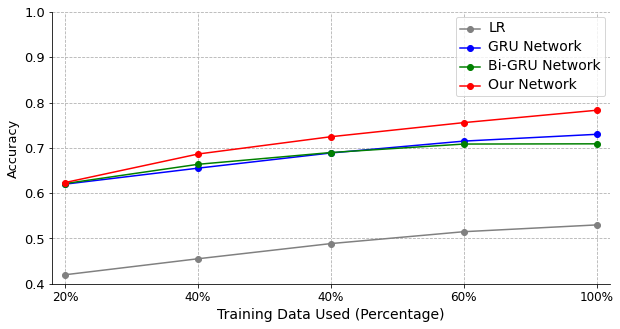

In [ ]:
# coding=utf-8

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：SimHei
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

x = np.array([1, 2, 3, 4, 5])
LR = np.array([0.4200, 0.4553, 0.4888, 0.5150, 0.530])
VGG_supervised = np.array([0.6200, 0.6553, 0.6888, 0.7150, 0.730])
VGG_unsupervised = np.array([0.6213, 0.6638, 0.6898, 0.7085, 0.7090])
ourNetwork = np.array([0.6236, 0.6865, 0.7247, 0.7558, 0.7831])

# label在图示(legend)中显示。若为数学公式,则最好在字符串前后添加"$"符号
# color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
# 线型：-  --   -.  :    ,
# marker：.  ,   o   v    <    *    +    1
plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.plot(x, LR, marker='o', color="grey", label="LR", linewidth=1.5)
plt.plot(x, VGG_supervised, marker='o', color="blue", label="GRU Network", linewidth=1.5)
plt.plot(x, VGG_unsupervised, marker='o', color="green", label="Bi-GRU Network", linewidth=1.5)
plt.plot(x, ourNetwork, marker='o', color="red", label="Our Network", linewidth=1.5)

group_labels = ['20%', '40%', '40%', '60%', '100%']  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12)  # 默认字体大小为10
plt.yticks(fontsize=13)
# plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.xlabel("Training Data Used (Percentage)", fontsize=14)
plt.ylabel("Accuracy", fontsize=13)
plt.xlim(0.9, 5.1)  # 设置x轴的范围
plt.ylim(0.4, 1)

# plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=14)  # 设置图例字体的大小和粗细

plt.savefig('./filename.pdf')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
plt.show()

### 训练多种模型

In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/train.py

True
CLEANING...: 100% 146995/146995 [04:38<00:00, 527.11it/s]
True 存在 1.0 条空数据
MAX SEQ LEN:4906
ALL WORDS:18859
DATA LEN:146994
<class 'numpy.ndarray'>
(146994, 12)
146994 146994
BUILD EMBEDDING: 100% 18859/18859 [00:00<00:00, 504405.58it/s]
2022-06-26 01:47:05.932665: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
130/130 [==============================] - ETA: 0s - loss: 0.4382 - categorical_accuracy: 0.32202022-06-26 01:48:00.171508: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
tcmalloc: large alloc 1440006144 bytes == 0x87094000 @  0x7fc2bb2cab6b 0x7fc2bb2ea379 0x7fc278411c07 0x7fc26684866f 0x7fc2668e4f4b 0x7fc2666f90f7 0x7fc2666f9960 0x7fc2666f9a68 0x7fc26cf12fdd 0x7fc266a8b2b8 0x7fc2737ce5df 0x7fc26cd10654 0x7fc26cd11731 0x7fc273d48a6f 0x7fc26cd0be15 0x7fc26c

In [ ]:
# Attention bi- GRU
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

True
CLEANING...: 100% 146995/146995 [04:33<00:00, 537.24it/s]
True 存在 1.0 条空数据
MAX SEQ LEN:4906
ALL WORDS:18859
DATA LEN:146994
<class 'numpy.ndarray'>
(146994, 12)
146994 146994
BUILD EMBEDDING: 100% 18859/18859 [00:00<00:00, 505143.23it/s]
2022-06-26 04:15:07.760840: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
130/130 [==============================] - ETA: 0s - loss: 0.2363 - categorical_accuracy: 0.41682022-06-26 04:16:08.930248: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
tcmalloc: large alloc 1440006144 bytes == 0x9952e000 @  0x7f5a5e563b6b 0x7f5a5e583379 0x7f5a1b6bac07 0x7f5a09af166f 0x7f5a09b8df4b 0x7f5a099a20f7 0x7f5a099a2960 0x7f5a099a2a68 0x7f5a101bbfdd 0x7f5a09d342b8 0x7f5a16a775df 0x7f5a0ffb9654 0x7f5a0ffba731 0x7f5a16ff1a6f 0x7f5a0ffb4e15 0x7f5a0f

In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

True
CLEANING...: 100% 146995/146995 [04:32<00:00, 540.00it/s]
True 存在 1.0 条空数据
MAX SEQ LEN:4906
ALL WORDS:18859
DATA LEN:146994
<class 'numpy.ndarray'>
(146994, 12)
146994 146994
BUILD EMBEDDING: 100% 18859/18859 [00:00<00:00, 497355.28it/s]
2022-06-26 07:15:49.099153: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
2022-06-26 07:15:52.068157: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "11010" } environment { key: "cudnn" value: "8005" } num_registers: 65536 l1_cache_size: 24576 l2_cache_si

In [ ]:
!python /content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication/run.py

True
CLEANING...: 100% 146995/146995 [04:33<00:00, 538.16it/s]
True 存在 1.0 条空数据
MAX SEQ LEN:4906
ALL WORDS:18859
DATA LEN:146994
<class 'numpy.ndarray'>
(146994, 12)
146994 146994
BUILD EMBEDDING: 100% 18859/18859 [00:00<00:00, 491581.50it/s]
2022-06-26 10:13:00.939773: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/100
130/130 [==============================] - ETA: 0s - loss: 0.2378 - categorical_accuracy: 0.41712022-06-26 10:13:54.735102: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
tcmalloc: large alloc 1440006144 bytes == 0x99b82000 @  0x7f95243deb6b 0x7f95243fe379 0x7f94e1537c07 0x7f94cf96e66f 0x7f94cfa0af4b 0x7f94cf81f0f7 0x7f94cf81f960 0x7f94cf81fa68 0x7f94d6038fdd 0x7f94cfbb12b8 0x7f94dc8f45df 0x7f94d5e36654 0x7f94d5e37731 0x7f94dce6ea6f 0x7f94d5e31e15 0x7f94d5

In [ ]:
!cp -r /content/privacy-policy-historical /content/drive/MyDrive/privacy

In [ ]:
# -*- coding: utf-8 -*-
import datetime
import pickle
import gc

import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint,
                                        ReduceLROnPlateau)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import numpy as np

import sys
sys.path.insert(0, "/content/drive/MyDrive/privacy/Keras_Multi_Label_TextClassfication")
from model import *
from config import *
from load_data import load_data
abstract, labels = load_data(TRAIN_PATH)
# print(len(abstract),len(labels))
# 词向量
# tokenizer = Tokenizer(num_words=MAX_WORDS_LEN, lower=True)
# tokenizer.fit_on_texts(abstract)
# sequences = tokenizer.texts_to_sequences(abstract)
# data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LEN)

# print(type(data))

# #类别编码
# le = LabelEncoder()
# le.fit(labels)
# labels =  le.transform(labels) 
# en_labels = tf.keras.utils.to_categorical(labels,num_classes=12)
# print(en_labels.shape)
# print(len(data),len(labels))

True


CLEANING...: 100%|██████████| 262944/262944 [00:19<00:00, 13655.52it/s]


True 存在 4621.0 条空数据
MAX SEQ LEN:768
ALL WORDS:6021
DATA LEN:258323


In [ ]:
len(set(labels))

160971

In [ ]:
import os
#安装编译enchant包
!apt-get install libenchant1c2a
path = "/content/enchant"
os.makedirs(path, exist_ok=True)
os.chdir(path)
!tar -zxvf /content/drive/MyDrive/data/enchant/enchant-1.6.0.tar.gz
!/content/enchant-1.6.0/configure --prefix=/usr/local/enchant
!make 
!make install
!pip install pyenchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB

In [ ]:
# Two lists of sentences
sentences1 = ['如何更换花呗绑定银行卡',
              'The cat sits outside',
              'A man is playing guitar',
              'The new movie is awesome']

labels = ['Introductory/Generic',
'First Party Collection/Use',
'Data Retention',
'Data Security',
'International',
'Do Not Track',
'Privacy contact information',
'Practice not covered',
'User Choice/Control',
'Third Party Sharing/Collection', 
'User Access, Edit and Deletion',
'Policy Change']
embeddings2 = model.encode(sentences2)
# Compute embedding for both lists
embeddings1 = model.encode(sentences1)



# Compute cosine-similarits
cosine_scores = cos_sim(embeddings1, embeddings2)
cosine_scores

(12, 12)

In [ ]:
import sys
from sentence_transformers.util import cos_sim
from sentence_transformers import SentenceTransformer as SBert

#model = SBert('paraphrase-multilingual-MiniLM-L12-v2') #如果这调用模型有问题，需自行下载，该模型 ，
#[下载网址](https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/)

model = SBert("C:\\Users\xxxx\Downloads\\paraphrase-multilingual-MiniLM-L12-v2")

# Two lists of sentences
sentences1 = ['如何更换花呗绑定银行卡',
              'The cat sits outside',
              'A man is playing guitar',
              'The new movie is awesome']

sentences2 = ['花呗更改绑定银行卡',
              'The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

# Compute embedding for both lists
embeddings1 = model.encode(sentences1)
embeddings2 = model.encode(sentences2)


# Compute cosine-similarits
cosine_scores = cos_sim(embeddings1, embeddings2)
cosine_scores



### Train Model

In [ ]:
# 切换当前的工作目录，以便导入相关的包

import sys
sys.path.insert(0, "/content/policy_privacy_benchmarks/")

In [ ]:
# 下载300d词向量
# !wget https://archive.org/download/glove.6B.50d-300d/glove.6B.300d.txt
#!wget https://www.kaggle.com/datasets/anindya2906/glove6b/download
##!unzip -d config.glove_path glove.6B.zip

In [ ]:
# 修改代码匹配当前工作环境
# 1.1 在config.py dataset/py utils.py 切换 当前目录
# sys.path.insert(0, "/content/policy_privacy_benchmarks/")

# 1.2 修改根目录 原始数据 词向量文件
# dataroot = '/content/policy_privacy/data/'
# os.makedirs(dataroot, exist_ok=True)
# processed_data_path = dataroot + 'processed_data.json'

# raw_data_path = '/content/Polisis_Benchmark/raw_data'
# glove_path = '/content/drive/MyDrive/data/glove/'
# num_categories = 12

# 1.3 处理原始数据
!python /content/policy_privacy_benchmarks/tools/preprocess_raw_data.py

processing data...
done, the data path is: /content/policy_privacy/data/processed_data.json


In [ ]:
!python /content/policy_privacy_benchmarks/tools/create_dictionary.py

one sample of the segments:  Changes to Our Online Privacy Policy: Digital technology is rapidly evolving. If we decide to change our Privacy Policy in the future, we'll post the changes here and indicate at the top of the policy the last date on which it was updated. Unless otherwise noted, all changes will be effective when posted.
mean of the segment length: 71
min of the segment length: 1
max of the segment length: 374
dictionary dumped to /content/policy_privacy/data/dictionary.json
loading dictionary from /content/policy_privacy/data/dictionary.json
embedding dim is 300


In [ ]:
!python /content/policy_privacy_benchmarks/tools/split_datasets.py

In [ ]:
!python /content/policy_privacy_benchmarks/main.py

In [ ]:
!python /content/policy_privacy_benchmarks/main.py

seed:  28
epochs 20
lr 0.002
optimizer adam
loading dictionary from /content/policy_privacy/data/dictionary.json
length of entries: 2503
loading dictionary from /content/policy_privacy/data/dictionary.json
length of entries: 1289
train E000:   0% 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
train E000: 100% 79/79 [00:10<00:00,  7.38it/s, f1=0.1939, loss=6.1400, prc=0.1721, rec=0.4396]
test E000: 100% 41/41 [00:01<00:00, 25.61it/s, f1=0.2148, loss=4.0713, prc=0.2661, rec=0.1936]
train E001: 100% 79/79 [00:10<00:00,  7.32it/s, f1=0.2936, loss=3.8951, prc=0.3551, rec=0.2719]
test E001: 100% 41/41 [00:01<00:00, 25.25it/s, f1=0.4354, loss=3.5100, prc=0.5283, rec=0.4051]
train E002: 100% 79/79 [00:10<00:00,  7.35it/s, f1=0.5080, loss=3.3333, prc=0.6418, rec=0.4579]
test E002: 100% 41/41 [00:

In [ ]:
import torch
import numpy as np

input = torch.from_numpy(np.array([[1,2,3,4],[5,6,7,0],[9,3,0,0]]))
length = [4,3,2] # lengths array has to be sorted in decreasing order
result = torch.nn.utils.rnn.pack_padded_sequence(input,lengths=length,batch_first=True)

print("==============二维输出=============")
print(result)

==============二维输出=============
PackedSequence(data=tensor([1, 5, 9, 2, 6, 3, 3, 7, 4]), batch_sizes=tensor([3, 3, 2, 1]), sorted_indices=None, unsorted_indices=None)


In [ ]:
import torch
print(torch.__version__)

1.11.0+cu113


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 753.4 MB 6.6 kB/s 
     |████████████████████████████████| 21.0 MB 13.5 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 90.9 MB/s 
     |████████████████████████████████| 23.3 MB 12.4 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 662 kB/s 
     |████████████████████████████████| 17.3 MB 147 kB/s 
     |████████████████████████████████| 12.8 MB 17.7 MB/s 
     |████████████████████████████████| 12.7 MB 95 kB/s 
     |████████████████████████████████| 11.8 MB 21.9 MB/s 
     |████████████████████████████████| 5.9 MB 51.9 MB/s 
     |████████████████████████████████| 6.6 MB 18.4 MB/s 
     |████████████████████████████████| 6.6 MB 58.3 MB/s 
     |████████████████████

In [ ]:
sci = pd.read_csv('/content/Polisis_Benchmark/raw_data/1017_sci-news.com.csv',header=None)
sci

,0,1,2
0,0,Privacy Policy Sci-News.com is committed to pr...,Introductory/Generic
1,1,Information that Sci-News.com May Collect Onli...,First Party Collection/Use
2,2,"- if you contact us, we may keep a record of t...",Data Retention
3,3,- details of your visits to our site including...,First Party Collection/Use
4,4,Sci-News.com does not knowingly collect or sol...,International and Specific Audiences
5,4,Sci-News.com does not knowingly collect or sol...,Privacy contact information
6,5,Use of Cookies Sci-News.com uses cookie techno...,First Party Collection/Use
7,6,During the course of any visit to the Sci-News...,Practice not covered
8,7,Please note that during or after your visits t...,Practice not covered
9,8,You may refuse to accept cookies by activating...,User Choice/Control


In [ ]:
sci.2.values

SyntaxError: ignored

[array(['Introductory/Generic'], dtype=object),
 array(['First Party Collection/Use'], dtype=object),
 array(['Data Retention'], dtype=object),
 array(['First Party Collection/Use'], dtype=object),
 array(['International and Specific Audiences'], dtype=object),
 array(['Privacy contact information'], dtype=object),
 array(['First Party Collection/Use'], dtype=object),
 array(['Practice not covered'], dtype=object),
 array(['Practice not covered'], dtype=object),
 array(['User Choice/Control'], dtype=object),
 array(['Third Party Sharing/Collection'], dtype=object),
 array(['User Choice/Control'], dtype=object),
 array(['User Access, Edit and Deletion'], dtype=object),
 array(['Privacy contact information'], dtype=object),
 array(['Privacy contact information'], dtype=object),
 array(['First Party Collection/Use'], dtype=object),
 array(['Third Party Sharing/Collection'], dtype=object),
 array(['Introductory/Generic'], dtype=object),
 array(['Policy Change'], dtype=object),
 array(['Fir

In [ ]:
len(os.listdir('/content/Polisis_Benchmark/raw_data'))

115

### 利用deep-text代码提取文本难度特征

In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 10.1 MB/s 
     |████████████████████████████████| 2.0 MB 63.5 MB/s 


In [ ]:
import textstat

# raygor
raygor_of_keys = dict()
raygor_of_keys_to_ignore = dict()

from_y = 27
for y in range(3, 6):
    for x in range(6, from_y):
        raygor_of_keys_to_ignore[f"{y}:{x}"] = 0
    from_y = from_y - 8

to_y = 44
for y in range(7, 29):
    to_y = to_y - 1
    for x in reversed(range(to_y, 45)):
        raygor_of_keys_to_ignore[f"{y}:{x}"] = 0

raygor_number = 3
for y in range(3, 29):
    if y % 2 == 0:
        raygor_number = raygor_number + 1
    for x in range(6, 45):
        the_key = f"{y}:{x}"
        if raygor_of_keys_to_ignore.get(the_key) == 0:
            continue
        raygor_of_keys[the_key] = raygor_number


def get_value_from_raygor_graph(y_value, x_value):
    return raygor_of_keys.get(f"{y_value}:{x_value}", 0) * 2


# fry
fry_of_keys = dict()
fry_of_keys_to_ignore = dict()

from_y = 128
for y in range(2, 5):
    for x in range(108, from_y):
        fry_of_keys_to_ignore[f"{y}:{x}"] = 0
    from_y = from_y - 8

to_y = 172
for y in range(7, 26):
    to_y = to_y - 2
    for x in reversed(range(to_y, 173)):
        fry_of_keys_to_ignore[f"{y}:{x}"] = 0

fry_number = 1
for y in reversed(range(2, 26)):
    if y % 2 == 0:
        fry_number = fry_number + 1
    for x in range(108, 173):
        the_key = f"{y}:{x}"
        if fry_of_keys_to_ignore.get(the_key) == 0:
            continue
        fry_of_keys[the_key] = fry_number


def get_value_from_fry_graph(y_value, x_value):
    return fry_of_keys.get(f"{y_value}:{x_value}", 0)

def count_raygor_readability(data_list):
    sentence_numbers = 0
    words_count_bigger_six = 0
    # computation
    words_count = 0
    for sentence in data_list:
        sentence_numbers = sentence_numbers + 1
        words_count = words_count + textstat.lexicon_count(sentence)
        words_count_bigger_six = words_count_bigger_six + len([1 for n in sentence.split() if len(n) > 6])
        if words_count >= 50:
            break

    # computation
    words_count = 0
    for sentence in reversed(data_list):
        sentence_numbers = sentence_numbers + 1
        words_count = words_count + textstat.lexicon_count(sentence)
        words_count_bigger_six = words_count_bigger_six + len([1 for n in sentence.split() if len(n) > 6])
        if words_count >= 50:
            break

    return get_value_from_raygor_graph(sentence_numbers, words_count_bigger_six)


def count_fry_readability(data_list):
    sentence_numbers = 0
    syllables_numbers = 0
    # computation
    words_count = 0
    for sentence in data_list:
        sentence_numbers = sentence_numbers + 1
        syllables_numbers = syllables_numbers + textstat.syllable_count(sentence)
        words_count = words_count + textstat.lexicon_count(sentence)
        if words_count >= 150:
            break

    # computation
    words_count = 0
    for sentence in reversed(data_list):
        sentence_numbers = sentence_numbers + 1
        syllables_numbers = syllables_numbers + textstat.syllable_count(sentence)
        words_count = words_count + textstat.lexicon_count(sentence)
        if words_count >= 150:
            break

    avg_sentence_numbers = round(sentence_numbers / 3)
    avg_syllables_numbers = round(syllables_numbers / 3)

    return get_value_from_fry_graph(avg_sentence_numbers, avg_syllables_numbers)

text=" Your list is now clean enough that you can begin analyzing its contents in meaningful ways. Counting the frequency of specific words in the list can provide illustrative data. Python has an easy way to count frequencies, but it requires the use of a new type of variable: the dictionary. Before you begin working with a dictionary, consider the processes used to calculate frequencies in a list."
raygorReadability=count_raygor_readability(text)
fryReadability=count_fry_readability(text)
fryReadability

0

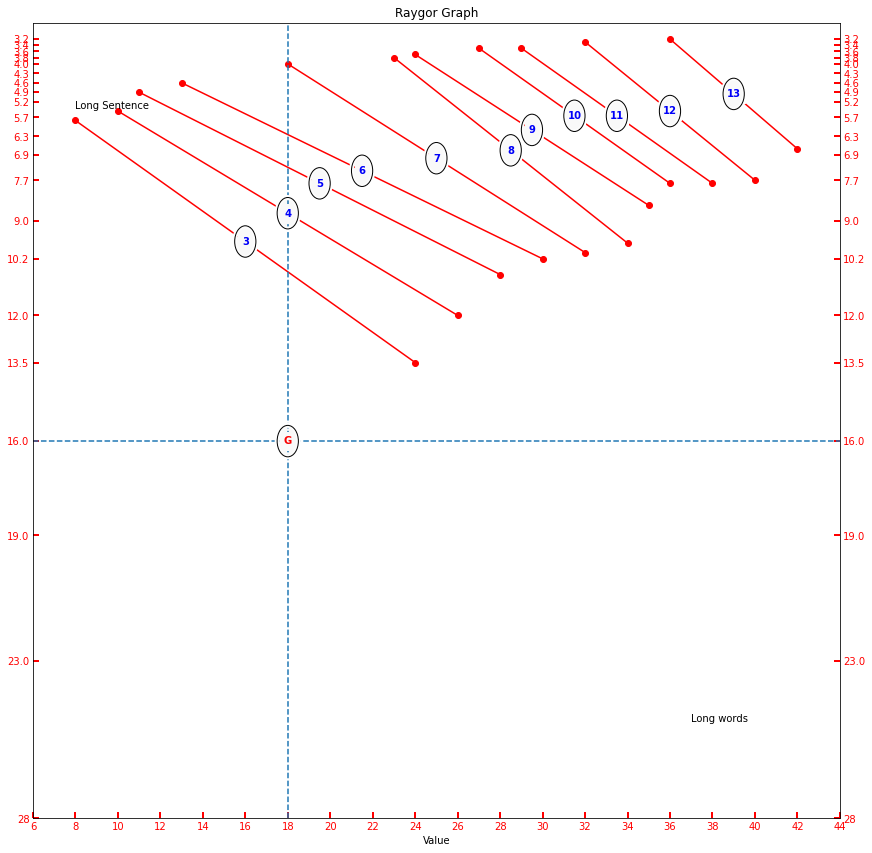

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, MaxNLocator

raygory_lines2 = {3:[(8,5.8),(24,13.5)],4:[(10,5.5),(26,12)],5:[(11,4.9),(28,10.7)],
                  6:[(13,4.6),(30,10.2)], 7:[(18,4),(32,10)],8:[(23,3.8),(34,9.7)],
                  9:[(24,3.7),(35,8.5)],10:[(27,3.5),(36,7.8)],11:[(29,3.5),(38,7.8)],
                  12:[(32,3.3),(40,7.7)],13:[(36,3.21),(42,6.7)]                                             
                  }

def circle(x, y, radius=0.5):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text,color='blue'):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='center', weight='bold', color=color)

#long sentences
from_y = 27
x_sent=[]
y_sent=[]
for y in range(3, 6):
    for x in range(6, from_y):
      x_sent.append(x)
      y_sent.append(y)
      # raygor_of_keys_to_ignore[f"{y}:{x}"] = 0
    from_y = from_y - 8

#long words
to_y = 44
x_word=[]
y_word=[]
for y in range(7, 29):
    to_y = to_y - 1
    for x in reversed(range(to_y, 45)):
      x_word.append(x)
      y_word.append(y)
      # raygor_of_keys_to_ignore[f"{y}:{x}"] = 0
      
fig, ax = plt.subplots(figsize=(12,12))
tick_spacing = 1
k2=3
for i in raygory_lines2.keys():
  x1,x2=raygory_lines2[i][0][0],raygory_lines2[i][1][0]
  y1,y2=raygory_lines2[i][0][1],raygory_lines2[i][1][1]
  # Blue plot
  circle((x1+x2)/2, (y1+y2)/2)
  text((x1+x2)/2, (y1+y2)/2, k2)
  plt.plot([x1,x2], [y1,y2], 'ro-')
  k2=k2+1

ax.set_xticks([i for i in range(6,46,2)])
y_label1=[28, 23.0, 19.0, 16.0, 13.5, 12.0, 10.2, 9.0, 7.7, 
               6.9, 6.3, 5.7, 5.2, 4.9, 4.6, 4.3, 4.0, 3.8, 3.6,
               3.4, 3.2]
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_yticks(y_label1)
ax.yaxis.set_ticklabels([str(y3) for y3 in y_label1])
# ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_title('Raygor Graph')
ax.set_xlabel('Value')
ax.axvline(x=18, linestyle='--')
ax.axhline(y=16, linestyle='--')  
circle(18, 16)
text(18, 16, 'G','red')

tex = r'Long words'
text1='Long Sentence'
ax.text(37, 25, tex, fontsize=10, va='bottom')
ax.text(8, 5.5, text1, fontsize=10, va='bottom')

# ax.fill_between([6,8,10],[4,3.4,3.2], interpolate=True)
plt.gca().invert_yaxis()
fig.tight_layout()
ax.tick_params(direction='in', length=6, width=2, colors='r', right=True, labelright='on')
#ax.fill_between([18,36,44,44],[28,12,7,28],1, interpolate=True)  
plt.show()

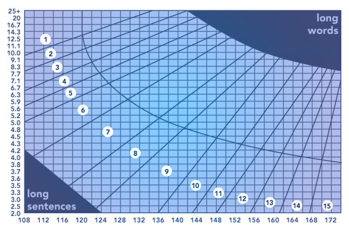

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.cbook import get_sample_data
from matplotlib.patches import Rectangle


imageArray=plt.imread('/content/drive/MyDrive/frygraph2lg.jpg')

fig,ax=plt.subplots(1,1)
ai=ax.imshow(imageArray)
# patch=Rectangle((1,0),200,3600)#提供一个图形以裁剪图片
# ai.set_clip_path(patch)#使用上面提供的图形对图片进行裁剪

ax.set_axis_off()#消除画布上的坐标轴

plt.show()

In [ ]:
!git clone https://github.com/shlomihod/deep-text-eval.git

Cloning into 'deep-text-eval'...
remote: Enumerating objects: 724, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 724 (delta 3), reused 0 (delta 0), pack-reused 716
Receiving objects: 100% (724/724), 335.25 MiB | 43.14 MiB/s, done.
Resolving deltas: 100% (338/338), done.


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=61715f0e6c41ca7d7df42b7e43e6c8620cbef11d132f8fb4d6f343f799dab08e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pd.read_csv()

In [ ]:
import glob
import itertools as it
from collections import Counter, defaultdict
from pprint import pprint

import numpy as np
import pandas as pd
import spacy
from tqdm import tqdm
from langdetect import detect_langs
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/privacy/labeled-corpus.csv',names= ['content','y'],header =None, index_col = False)
data

,content,y
0,linx®️ believes that spyware is a threat to co...,Policy Change
1,linx®️ uses pii to market products and service...,Privacy contact information
2,linx®️ may also use and disclose pii a to inve...,Privacy contact information
3,in the course of providing services to you we ...,International
4,linx®️ has invested and deployed a wide variet...,Data Security
...,...,...
244986,we may collect and disclose personal informati...,Introductory/Generic
244987,if you are a koru member we collect the person...,Third Party Sharing/Collection
244988,if you are an airpoints member we collect pers...,Third Party Sharing/Collection
244989,if you enter an air new zealand competition or...,First Party Collection/Use


In [ ]:
import glob
import itertools as it
from collections import Counter, defaultdict
from pprint import pprint

import numpy as np
import pandas as pd
import spacy
from tqdm import tqdm
from langdetect import detect_langs
from sklearn.model_selection import train_test_split

RANDOM_STATE = 70988860

N_BitGCSE = 800

TEST_SIZE = 0.2

# FIELDS = ['path', 'source', 'number']

# LEVELS = {'WRLevel2': 0, # Age 7–8
#           'WRLevel3': 1, # Age 8-9
#           'WRLevel4': 2, # Age 9-10
#           'BitKS3': 3,   # Age 11-14
#           'BitGCSE': 4}  # Age 14-16
LEVELS = {'Privacy contact information':0,
      'Data Retention':1,
      'Data Security':2,                 
      'User Choice/Control':3,            
      'Policy Change':4,                    
      'Third Party Sharing/Collection':5,   
      'International':6,                   
      'User Access, Edit and Deletion':7,     
      'Introductory/Generic':8,             
      'Do Not Track':9,               
      'First Party Collection/Use':10, 
      'Practice not covered':11}

WR_NON_CONTENT_LINES = ['All trademarks and logos are property of Weekly Reader Corporation.',
                'measures published under license with MetaMetrics, Inc.']

BBC_NON_CONTENT_LINES = ['This page is best viewed in an up-to-date web browser with style sheets (CSS) enabled.',
                        'While you will be able to view the content of this page in your current browser, you will not be able to get the full visual experience.',
                         'Please consider upgrading your browser software or enabling style sheets (CSS) if you are able to do so.',
                         'The BBC is not responsible for the content of external internet sites.',
                         'For information on how to enable JavaScript please go to th.',
                         'You will not be able to see this content until you have JavaScript switched on.',
                         'Your web browser does not have JavaScript switched on at the moment.',
                         'You have disabled Javascript, or are not running Javascript on this browser.',
                         'Go to th.',
                         'go to th.',
                         'The enhanced version of the site requires the Flash 8 plugin (or higher) to be installed and JavaScript to be enabled on your browser.',
                         'To find out how to turn on JavaScript',
                         'The enhanced version of the site requires the Flash 8 plugin (or higher) to be installed and JavaScript to be enabled on your browser.',
                         'To find out how to install a Flash plugin,',
                         'The enhanced version of the site requires the Flash 8 plugin (or higher) to be installed and JavaScript to be enabled on your browser.',
                         'Download the Adobe Flash player to view this conten.',
                        ]


NON_CONTENT_LINES = WR_NON_CONTENT_LINES + BBC_NON_CONTENT_LINES

nlp = spacy.util.get_lang_class('en')()
# nlp.add_pipe(nlp.create_pipe('sentencizer'))
nlp.add_pipe('sentencizer')

def read_content(path):
    with open(path, 'r', encoding='latin-1') as f:
            return f.read()

        
def remove_non_content_lines(text):
    for line in NON_CONTENT_LINES:
        text = text.replace(line, '')
    return text.strip()


def get_english_detect_prob(detect_langs_result):
    return {result.lang: result.prob for result in detect_langs_result}.get('en', 0.0)


def filter_non_english(text_df, english_prob_threshold=0.99):
    langs = text_df['text'].apply(detect_langs)
    english_probs = langs.apply(get_english_detect_prob)
    text_df = text_df[english_probs > english_prob_threshold]
    return text_df


def filter_start_dups(text_df):
    """Removing all the texts that share a start with another text, with more than 4 lines from the beginning.
    This influences almost only on our biggest class by far, so it doesn't make our corpus smaller (BitGCSE)"""
    
    docs = [doc for doc in nlp.pipe(tqdm(text_df['text']))]

    all_lines = sum([list([sent.string.strip() for sent in doc.sents]) for doc in docs], [])
    lines_count = Counter(all_lines)
    just_lines = [list([str(sent) for sent in doc.sents]) for doc in docs]

    print('=== Most Common Lines ===')
    pprint(lines_count.most_common(15))
    print('=== End ===\n')
    
    pos2sent2ind = defaultdict(lambda : defaultdict(set))
    for ind, doc_lines in enumerate(just_lines):
        for pos, line in enumerate(doc_lines):
            pos2sent2ind[pos][line].add(ind)

    pos2ind = defaultdict(set)
    for pos in pos2sent2ind:
        for sent in pos2sent2ind[pos]:
            pos2ind[pos].update(set(it.combinations(pos2sent2ind[pos][sent], 2)))

    alreadys = set(pos2ind[1])
    highst_pos2ind = defaultdict(set)
    for pos in range(2, max(pos2ind.keys())+1):
        for ind_pair in alreadys - pos2ind[pos]:
                highst_pos2ind[pos-1].add(ind_pair)
        alreadys &= pos2ind[pos]

    start_dup_row_indices = set()
    for k in range(4, max(highst_pos2ind.keys())):
        if highst_pos2ind[k]:
            all_inds_per_pos = set.union(*[
                set(ind_pair) for ind_pair in highst_pos2ind[k]
            ])
            
            start_dup_row_indices.update(all_inds_per_pos)
            
    start_dup_row_indices_list = list(start_dup_row_indices)
            
    text_df = text_df.drop(text_df.index[start_dup_row_indices_list])

    return text_df

def downsample_BitGCSE(text_df):

    text_df_BitGCSE = text_df[text_df['source'] == 'BitGCSE']
    text_df_NOT_BitGCSE = text_df[text_df['source'] != 'BitGCSE']

    text_df_BitGCSE = text_df_BitGCSE.sample(N_BitGCSE,
                                             replace=False,
                                             random_state=RANDOM_STATE)

    text_df = pd.concat([text_df_BitGCSE, text_df_NOT_BitGCSE])
    
    print('=== Source Counts ===')
    print(text_df['source'].value_counts())
    print('=== End ===\n')
                
    return text_df


def print_data_counts(text_df, train_df, test_df):
    text_counts = text_df['y'].value_counts()
    train_counts = train_df['y'].value_counts()
    test_counts = test_df['y'].value_counts()

    print(pd.DataFrame({
        '#text': text_counts,
        '%text': (100 * text_counts / text_counts.sum()).round(2),
        '#train': train_counts,
        '%train': (100 * train_counts / train_counts.sum()).round(2),
        '#test': test_counts,
        '%test': (100 * test_counts / test_counts.sum()).round(2),
    }).sort_index())
    

def prepare_corpus():
    # text_df = pd.DataFrame((dict(zip(FIELDS,
    #                 [article] + article.split('/')[1:]))
    #              for article in glob.glob('WeeBit-TextOnly/*/*')))

    text_df['number'] = text_df['number'].str[:-4]
    
    text_df['y'] = text_df['source'].map(LEVELS)

    print('Reading files...')
    text_df['text'] = (text_df['path'].apply(read_content).str
                                                          .replace('.\n', '. ')
                                                          .replace('\n', '. ')
                                                          .apply(remove_non_content_lines))
    print('#Texts =', len(text_df))
    
    print('Filtering empty texts...')
    text_df = text_df[text_df['text'].str.len() != 0]
    print('#Texts =', len(text_df))
    
    print('Removing duplicates...')
    text_df = text_df.drop_duplicates('text')
    print('#Texts =', len(text_df))
    
    print('Filter non english texts...')
    text_df = filter_non_english(text_df)
    print('#Texts =', len(text_df))
    
    print('Filter texts with duplicated start...')
    text_df = filter_start_dups(text_df)
    print('#Texts =', len(text_df))

    print('Downsample BitGCSE...')
    text_df = downsample_BitGCSE(text_df)
    
    print('Reset Index...')
    text_df = text_df.reset_index(drop=True)

    print('Train-Test Split...')
    train_df, test_df = train_test_split(text_df,
                                     test_size=TEST_SIZE,
                                     shuffle=True,
                                     stratify=text_df['y'],
                                     random_state=RANDOM_STATE)
    
    print_data_counts(text_df, train_df, test_df)
    
    return text_df, train_df, test_df


# def main():
#     text_df, train_df, test_df = prepare_corpus()
    
#     with pd.HDFStore('weebit.h5', mode='w') as store:
#         store.put('text_df', text_df)
#         store.put('train_df', train_df)
#         store.put('test_df', test_df)


# if __name__ == '__main__':
#     main()

In [ ]:
data.iloc[:,1:2].value_counts()

1                             
Privacy contact information       65053
Data Retention                    36590
Data Security                     31442
User Choice/Control               25904
Policy Change                     21270
Third Party Sharing/Collection    17548
International                     17510
User Access, Edit and Deletion     9763
Introductory/Generic               6518
Do Not Track                       6326
First Party Collection/Use         5382
Practice not covered               1685
dtype: int64

In [ ]:
text_df = pd.DataFrame()

In [ ]:
text_df['y'] = data.y.map(LEVELS)
text_df['text'] = data.content
text_df

In [ ]:
print('#Texts =', len(text_df))

print('Filtering empty texts...')
text_df = text_df[text_df['text'].str.len() != 0]
print('#Texts =', len(text_df))

#Texts = 244991
Filtering empty texts...
#Texts = 244991


In [ ]:
print('Removing duplicates...')
text_df = text_df.drop_duplicates('text')
print('#Texts =', len(text_df))

# print('Filter non english texts...')
# text_df = filter_non_english(text_df)
# print('#Texts =', len(text_df))

# print('Filter texts with duplicated start...')
# text_df = filter_start_dups(text_df)
# print('#Texts =', len(text_df))

In [ ]:
print('Reset Index...')
text_df = text_df.reset_index(drop=True)

print('Train-Test Split...')
train_df, test_df = train_test_split(text_df,
                                  test_size=TEST_SIZE,
                                  shuffle=True,
                                  stratify=text_df['y'],
                                  random_state=RANDOM_STATE)

print_data_counts(text_df, train_df, test_df)

Reset Index...
Train-Test Split...
    #text  %text  #train  %train  #test  %test
0   40607  26.99   32485   26.99   8122  26.99
1   22907  15.23   18326   15.23   4581  15.22
2   19313  12.84   15450   12.84   3863  12.84
3   15790  10.50   12632   10.50   3158  10.50
4   12560   8.35   10048    8.35   2512   8.35
5   10608   7.05    8486    7.05   2122   7.05
6   10826   7.20    8661    7.20   2165   7.20
7    6467   4.30    5174    4.30   1293   4.30
8    3431   2.28    2745    2.28    686   2.28
9    3558   2.36    2846    2.36    712   2.37
10   3323   2.21    2658    2.21    665   2.21
11   1056   0.70     845    0.70    211   0.70


In [ ]:
with pd.HDFStore('/content/drive/MyDrive/privacy/privacy.h5', mode='w') as store:
    store.put('text_df', text_df)
    store.put('train_df', train_df)
    store.put('test_df', test_df)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['text'], dtype='object')]

  if self.run_code(code, result):


In [ ]:
!pip install plac
!pip install textacy
!pip install benepar

In [ ]:
import itertools as it
from collections import Counter, deque, defaultdict

import numpy as np
import pandas as pd
import spacy
from benepar.spacy_plugin import BeneparComponent
from tqdm import tqdm
from textacy import extract
from textacy.text_stats import TextStats

/usr/local/lib/python3.7/dist-packages/benepar/spacy_plugin.py:12: FutureWarning: BeneparComponent and NonConstituentException have been moved to the benepar module. Use `from benepar import BeneparComponent, NonConstituentException` instead of benepar.spacy_plugin. The benepar.spacy_plugin namespace is deprecated and will be removed in a future version.
  FutureWarning,


In [ ]:
import nltk
benepar.download('benepar_en_small')
spacy.tokens.Doc.set_extension('features', default={}, force=True)

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe(BeneparComponent("benepar_en_small"))
nlp.add_pipe(extract_doc_features, name='extract_doc_features', first=False)

In [ ]:
!python3 /content/deep-text-eval/text2features/nlp_extractor.py